# SI 370 - Homework 3: Statistical Analysis I

## Objectives
1. Load and clean data in IPython.
2. Produce descriptive statistics.
3. Calculate a basic correlation and regression.

## Please fill in...
### * Your name: William Juang
### * People you worked with:  Elle Leora, Peter Mack

## **Submission Instructions:**
After completing this homework, you should turn in two files via SI 370 001 WN 2017 > Assignments:
1. A Jupyter Notebook file named hw3-YOUR_UNIQUE_NAME.ipynb.  Please observe the following requirements:
    * This file should show all of the required work, including code, results, visualizations (if any), and necessary comments to your code.
    * You should use Markdown cells to enclose all textual content, including explanations, discoveries, and conclusions. Do not include such content unless required.
    * Irrelevant code and results should be deleted prior to submission.
2. An html file named hw3-YOUR_UNIQUE_NAME.html showing the preview of the above Jupyter Notebook. To create this file, select File > Download as HTML. We want this in case something breaks when we load your notebook.  This will let us see what you saw when you were done.

# Load everything up that we need

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
sns.set(style='ticks', color_codes=True)

In [3]:
# make the Pandas tables a little more readable

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

# 1. Download and Import Data

Go to SI 370 001 WN 2017 > Files > Datasets, and download nutritions.csv. Import it into your Jupyter Notebook as a Pandas DataFrame.

This is a filtered and cleaned version of USDA nutrition dataset. The original dataset contains detailed measurements of nutritions for more than 8000 food items and more than 200 nutrition measures. This cleaned version contains 2346 food items and 11 nutrition measures.

The dataset contains the following columns:
* **FoodID**: unique ID of the food item
* **GroupID**: unique ID of the food group the item belongs to
* **Food**: the name of the food in verbose format of description
* **Group**: the name of the group
* **Energy**: measure in KCal per 100g of the food item
* **Protein, Fat, Carbohydrate, Ash, Water, Sugars, Fiber**: measures in g per 100g of the food item
* **Calcium, Iron, Sodium**: measure in mg per 100g of the food item

The dataset contains six different food groups:
* Breakfast Cereals
* Snacks
* Beef Products
* Beverages
* Sweets
* Fast Foods

We will ask you to perform aggregation on the group level in this homework.

In [4]:
# Import Data
df_raw = pd.read_csv('nutritions.csv')
df_raw.shape

(2346, 15)

# 2. Cleaning data & Descriptive Statistics

The dataset needs some additional cleaning by you. Please perform the following cleaning tasks in sequence:

### 2(a) Remove all rows that have any invalid values (NA).
	Hint: use dropna() for a DataFrame.

In [5]:
df_raw = df_raw.dropna()
df_raw

,FoodID,GroupID,Food,Group,Protein,Fat,Carbohydrate,Ash,Energy,Water,Sugars,Fiber,Calcium,Iron,Sodium
0,8001,800,"Cereals ready-to-eat, KELLOGG, KELLOGG'S ALL-B...",Breakfast Cereals,13.14,4.90,74.24,5.60,260.0,2.12,15.69,29.3,389.0,17.60,258.0
1,8002,800,"Cereals ready-to-eat, POST, ALPHA-BITS",Breakfast Cereals,8.10,3.80,83.70,3.20,385.0,1.20,35.50,5.7,29.0,6.40,634.0
2,8003,800,"Cereals ready-to-eat, KELLOGG, KELLOGG'S APPLE...",Breakfast Cereals,5.00,1.90,88.20,2.40,366.0,2.50,44.00,9.3,11.0,16.10,459.0
3,8005,800,"Cereals ready-to-eat, KELLOGG, KELLOGG'S ALL-B...",Breakfast Cereals,7.00,2.15,80.00,7.90,250.0,3.00,27.00,43.0,63.0,15.00,676.0
4,8010,800,"Cereals ready-to-eat, QUAKER, CAP'N CRUNCH",Breakfast Cereals,4.39,5.12,85.51,2.48,398.0,2.50,44.32,2.5,11.0,19.42,754.0
5,8011,800,"Cereals ready-to-eat, QUAKER, CAP'N CRUNCH wit...",Breakfast Cereals,4.45,4.83,85.90,2.32,397.0,2.50,44.20,2.6,11.0,19.88,725.0
6,8012,800,"Cereals ready-to-eat, QUAKER, CAP'N CRUNCH'S P...",Breakfast Cereals,7.10,9.23,78.65,2.52,417.0,2.50,33.36,2.7,9.0,18.36,742.0
7,8013,800,"Cereals ready-to-eat, GENERAL MILLS, CHEERIOS",Breakfast Cereals,12.09,6.73,73.23,2.81,371.0,5.13,4.36,9.4,401.0,33.17,576.0
8,8014,800,"Cereals ready-to-eat, KELLOGG, KELLOGG'S COCOA...",Breakfast Cereals,5.22,2.90,86.05,3.02,389.0,2.81,38.50,1.9,130.0,14.70,424.0
9,8015,800,"Cereals ready-to-eat, POST, COCOA PEBBLES",Breakfast Cereals,4.70,4.20,85.80,2.80,397.0,2.50,34.50,1.5,21.0,6.00,586.0


### 2(b) The five basic proximates (Ash, Fat, Protein, Water, and Carbohydrate) should always add up to 100g per food item. Remove the food entries whose five basic proximates do not sum to 100g, with 1g tolerance on both sides. That means, if for a food entry the sum is within (99, 101), then we can keep it.

In [6]:
# 2(b) Remove the food entries whose five 
#      basic proximates do not sum to 100g, 
#      with 1g tolerance on both sides.

df_raw = df_raw[(df_raw.Ash + df_raw.Fat + df_raw.Protein + df_raw.Water + df_raw.Carbohydrate >= 99)]
df_raw = df_raw[(df_raw.Ash + df_raw.Fat + df_raw.Protein + df_raw.Water + df_raw.Carbohydrate <= 101)]
df_raw

,FoodID,GroupID,Food,Group,Protein,Fat,Carbohydrate,Ash,Energy,Water,Sugars,Fiber,Calcium,Iron,Sodium
0,8001,800,"Cereals ready-to-eat, KELLOGG, KELLOGG'S ALL-B...",Breakfast Cereals,13.14,4.90,74.24,5.60,260.0,2.12,15.69,29.3,389.0,17.60,258.0
1,8002,800,"Cereals ready-to-eat, POST, ALPHA-BITS",Breakfast Cereals,8.10,3.80,83.70,3.20,385.0,1.20,35.50,5.7,29.0,6.40,634.0
2,8003,800,"Cereals ready-to-eat, KELLOGG, KELLOGG'S APPLE...",Breakfast Cereals,5.00,1.90,88.20,2.40,366.0,2.50,44.00,9.3,11.0,16.10,459.0
3,8005,800,"Cereals ready-to-eat, KELLOGG, KELLOGG'S ALL-B...",Breakfast Cereals,7.00,2.15,80.00,7.90,250.0,3.00,27.00,43.0,63.0,15.00,676.0
4,8010,800,"Cereals ready-to-eat, QUAKER, CAP'N CRUNCH",Breakfast Cereals,4.39,5.12,85.51,2.48,398.0,2.50,44.32,2.5,11.0,19.42,754.0
5,8011,800,"Cereals ready-to-eat, QUAKER, CAP'N CRUNCH wit...",Breakfast Cereals,4.45,4.83,85.90,2.32,397.0,2.50,44.20,2.6,11.0,19.88,725.0
6,8012,800,"Cereals ready-to-eat, QUAKER, CAP'N CRUNCH'S P...",Breakfast Cereals,7.10,9.23,78.65,2.52,417.0,2.50,33.36,2.7,9.0,18.36,742.0
7,8013,800,"Cereals ready-to-eat, GENERAL MILLS, CHEERIOS",Breakfast Cereals,12.09,6.73,73.23,2.81,371.0,5.13,4.36,9.4,401.0,33.17,576.0
8,8014,800,"Cereals ready-to-eat, KELLOGG, KELLOGG'S COCOA...",Breakfast Cereals,5.22,2.90,86.05,3.02,389.0,2.81,38.50,1.9,130.0,14.70,424.0
9,8015,800,"Cereals ready-to-eat, POST, COCOA PEBBLES",Breakfast Cereals,4.70,4.20,85.80,2.80,397.0,2.50,34.50,1.5,21.0,6.00,586.0


### 2(c) Report the number of entries that are removed at each step.

In [7]:
# 2(c) Report the number of entries that are removed at each step.

# in 2(a) 2346 - 1879 = 467 entries removed
# in 2(b) 1879 - 1727 = 152 entries removed 

### 2(d) What is the mean Carbohydrates among all food entries?

In [8]:
# 2(d) What is the mean Carbohydrates for all food entries?

df_raw.Carbohydrate.mean()

32.91823972206137

### 2(e) What is the mean Proteins for each group (Beverages, Snack, Sweets, etc.)?

In [39]:
# 2(e) What is the mean Proteins for each group?

twoe = df_raw.groupby('Group')['Protein'].mean().to_frame()
twoe

,Protein
Group,
Beef Products,24.221713
Beverages,1.856000
Breakfast Cereals,7.959321
Fast Foods,10.780041
Snacks,9.815094
Sweets,4.301043


### 2(f) Which food has the highest Proteins for each group? What about Energy, Sugar, and Water?

In [145]:
# 2(f) Which food has the highest Proteins for each group? 

twofProtein = df_raw.groupby('Group').apply(lambda row: df_raw.ix[np.argmax(row.Protein), ['Food', 'Protein']])
twofProtein.sort_values('Protein', ascending=False)

,Food,Protein
Group,,
Sweets,"Gelatins, dry powder, unsweetened",85.60
Snacks,"Snacks, pork skins, plain",61.30
Beef Products,"Beef, chuck, arm pot roast, separable lean onl...",34.72
Breakfast Cereals,"Cereals ready-to-eat, KELLOGG'S, SPECIAL K Pro...",33.70
Fast Foods,"Fast Foods, Fried Chicken, Wing, meat only, sk...",28.49
Beverages,"Cocoa mix, with aspartame, low calorie, powder...",25.10


In [143]:
twofEnergy = df_raw.groupby('Group').apply(lambda row: df_raw.ix[np.argmax(row.Energy), ['Food', 'Energy']])
twofEnergy.sort_values('Energy', ascending=False)

,Food,Energy
Group,,
Beef Products,"Beef, variety meats and by-products, suet, raw",854.0
Sweets,"Chocolate, dark, 70-85% cacao solids",598.0
Snacks,"Snacks, popcorn, oil-popped, microwave, regula...",583.0
Beverages,"Coffee, dry, powder, with whitener, reduced ca...",509.0
Breakfast Cereals,"Cereals ready-to-eat, granola, homemade",489.0
Fast Foods,"McDONALD'S, McDONALDLAND Chocolate Chip Cookies",480.0


In [142]:
twofSugar = df_raw.groupby('Group').apply(lambda row: df_raw.ix[np.argmax(row.Sugars), ['Food', 'Sugars']])
twofSugar.sort_values('Sugars', ascending=False)

,Food,Sugars
Group,,
Sweets,"Sugars, granulated",99.80
Beverages,"Whiskey sour mix, powder",97.30
Snacks,"Snacks, candy bits, yogurt covered with vitamin C",65.00
Breakfast Cereals,"Cereals ready-to-eat, KELLOGG, KELLOGG'S HONEY...",56.20
Fast Foods,"McDONALD'S, Sweet 'N Sour Sauce",35.79
Beef Products,"Beef, grass-fed, strip steaks, lean only, raw",0.00


In [144]:
twofWater = df_raw.groupby('Group').apply(lambda row: df_raw.ix[np.argmax(row.Water), ['Food', 'Water']])
twofWater.sort_values('Water', ascending=False)

,Food,Water
Group,,
Beverages,"Water, bottled, generic",99.98
Sweets,"Pectin, liquid",96.90
Fast Foods,"McDONALD'S, Side Salad",93.93
Breakfast Cereals,"Cereals, Malt-o-Meal, plain, prepared with wat...",89.51
Beef Products,"Beef, variety meats and by-products, tripe, raw",84.16
Snacks,"Snacks, beef jerky, chopped and formed",23.36


### 2(g) Which group has the highest mean Energy?

In [11]:
# 2(g) Which group has the highest mean Energy?

twog = df_raw.groupby('Group')['Energy'].mean().to_frame()
twog.sort_values('Energy', ascending=False).head(1)

,Energy
Group,
Snacks,445.735849


### 2(h) Create a histogram showing the distribution of Fat for Fast Foods. (make sure to set the axis labels and title the graphic.  Hint: set_title and set_xlabel)

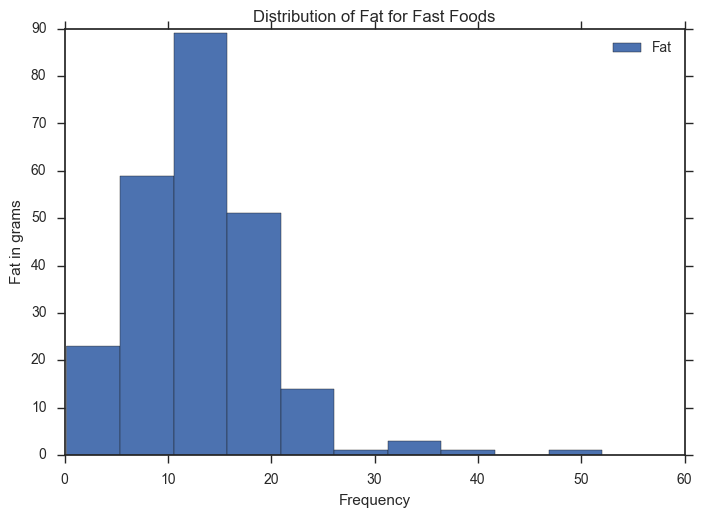

In [12]:
# 2(h) Create a histogram showing the distribution of Fat for Fast Foods.

twoh = df_raw[df_raw.Group == "Fast Foods"]['Fat'].to_frame()
twoh = twoh.plot(kind='hist', title = "Distribution of Fat for Fast Foods")
twoh.set_xlabel("Frequency")
twoh.set_ylabel("Fat in grams")

## 3. Correlation and Regression
### (3a) Determine if you need to use a parametric (Pearson) or non-parametric (Kendall or Spearman) correlation when determining the correlation between Energy and Carbohydrates (among all food categories).  Use the appropriate plots to justify your answer.

C:\Users\juang_000\Anaconda3\envs\si370\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


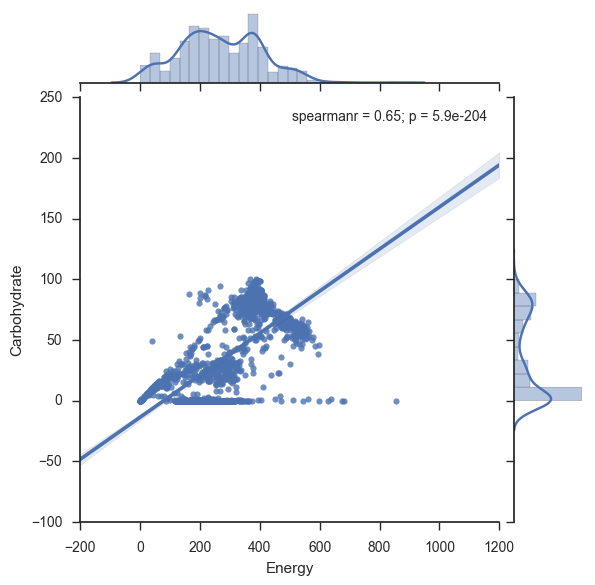

In [13]:
# 3(a)  Should you use a parametric or non-parametric correlation to test energy and Carbohydrates. Justify your answer

#Should use the Spearmans correlation because the data is not normal

df_threeaplot = sns.JointGrid(x='Energy', y='Carbohydrate', data = df_raw)
df_threeaplot = df_threeaplot.plot(sns.regplot, sns.distplot)
df_threeaplot = df_threeaplot.annotate(stats.spearmanr)
#threeaplot = sns.JointGrid(x='x', y='y', data = threea)

### 3(b) Based on yoru answer for (a), find the correlation between Energy and Carbohydrate among all food entries. How would you describe it qualitatively?  (e.g., High? Low?)

In [14]:
# 3(b) Based on yoru answer for (a), find the correlation between Energy and Carbohydrate among all food entries

# The correlation between Energy and Carbohydrate among all food entries is spearmeanr = 0.65, this number is moderately high for
# a dataset

### 3(c) Generate the correlation matrix between Energy, Carbohydrate, Fat, Protein, Ash, and Water.  

A Correlation matrix in this case is a 6x6 table (rows and columns are the same: Energy, Carbohydrate, Fat, Protein, Ash, and Water) and the value and the value in the cell is the correlation (1 along the diagonal). 

It's ok to pick any correlation method you want here but a non-parametric one might be a "safer" choice since it will work regardless of the distribution.  Also, as a hint: this is one line of code, but you may need to go through the dataframe documentation.

In [15]:
# 3(c) Generate the correlation matrix between Energy, Carbohydrate, 
#      Fat, Protein, Ash, and Water.

threec = df_raw[["Energy", "Carbohydrate", "Fat", "Protein", "Ash", "Water"]]
threec = threec.corr(method = 'spearman')

### 3(d) Generate a heatmap of the correlation matrix you built above

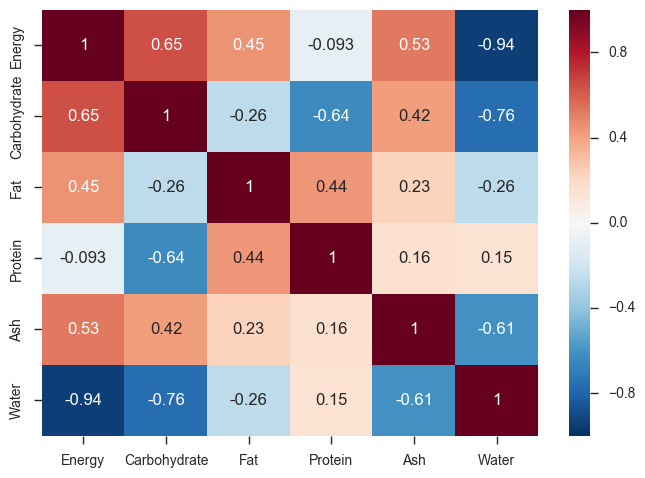

In [16]:
# 3(d) Visualize the correlation matrix.
sns.heatmap(threec, annot=True)

### 3(e) Select only "Beef Products" and create a SPLOM for for the same  columns above (Energy, Carbohydrates, etc.).  From looking at them, which ones seem to have a strong positive or strong negative linear relationship (ones that might be suitable for linear regression)?

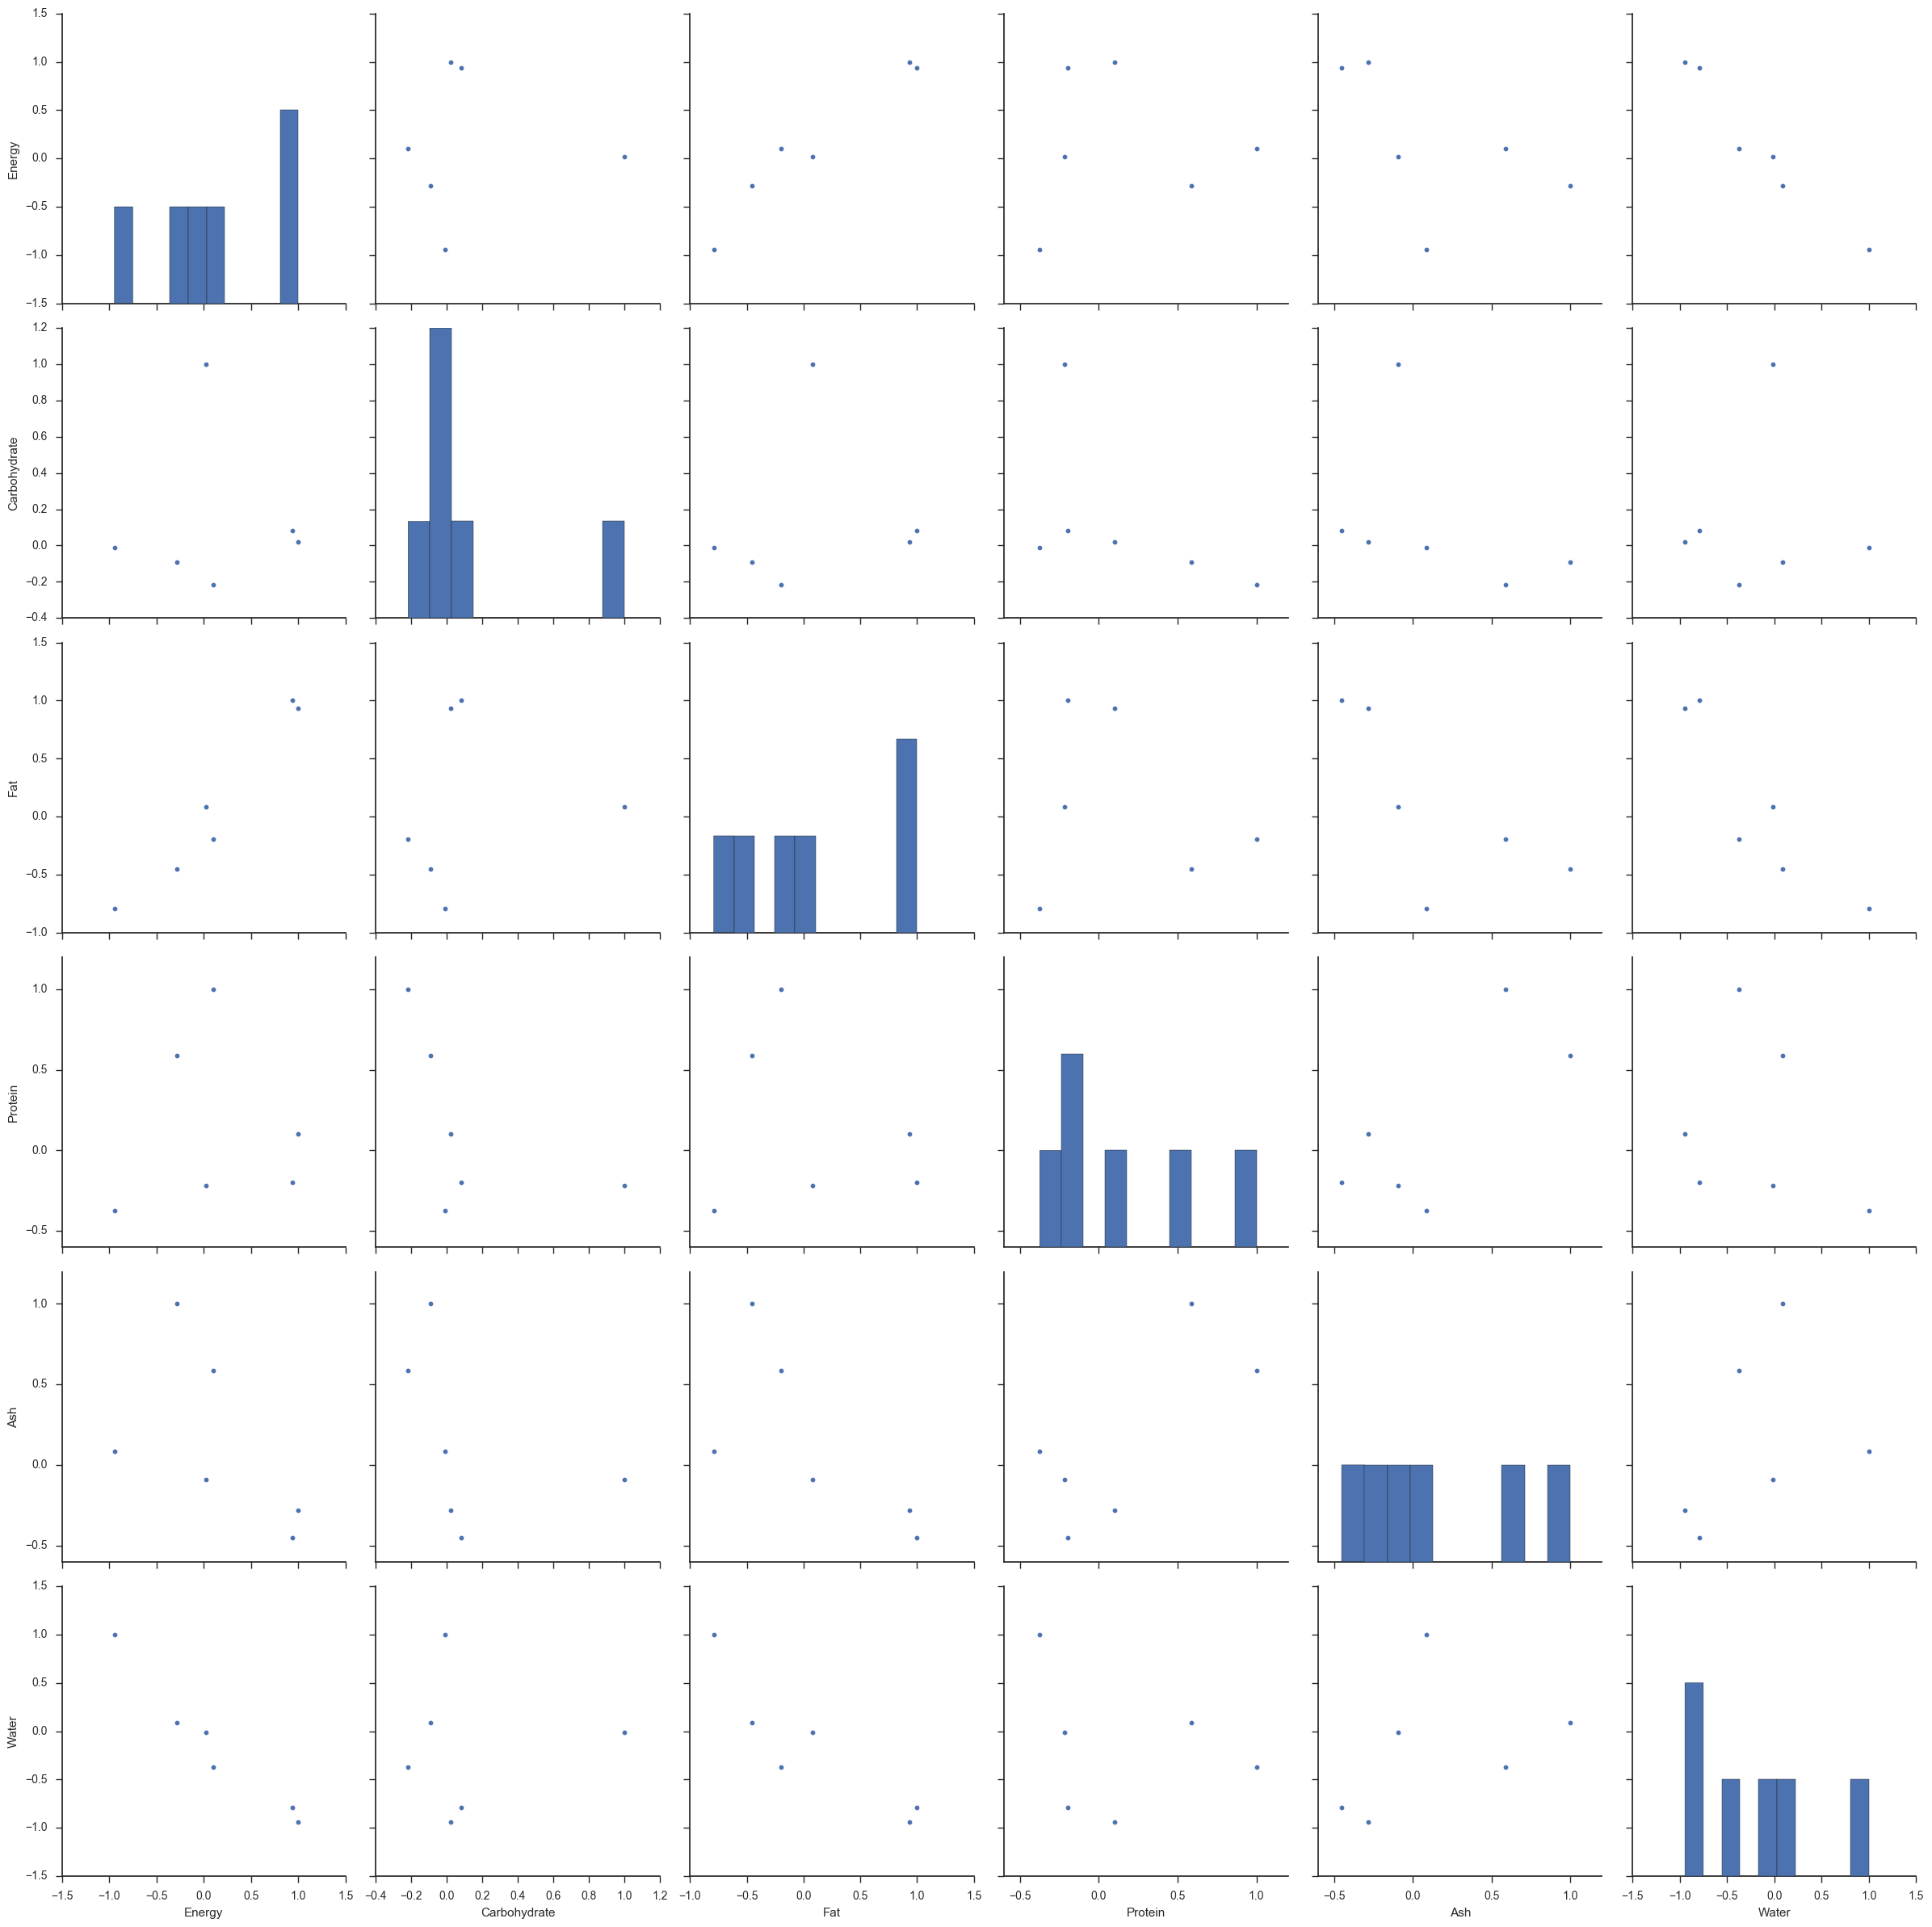

In [17]:
# 3(e) Generate a splom

df_beef = df_raw[df_raw.Group == "Beef Products"]
df_beef = df_beef[["Energy", "Carbohydrate", "Fat", "Protein", "Ash", "Water"]]
df_beef = df_beef.corr(method = 'spearman')
sns.pairplot(df_beef, size=4)

### 3(f) Build a simple regression model for Water and Energy (again Beef Products only). Report the slope/intercept, r-squared, etc.

Note that we're cheating a little.  Usually we'd check that Water and Energy are normally distributed. Spoiler: they're not really without transformation but we'll just go with it this week.


In [33]:
threef = df_raw[df_raw.Group == "Beef Products"]
threef = threef[["Water", "Energy"]]
threef_plot = smf.ols('Water ~ Energy', data=threef).fit()
print (threef_plot.summary())

intercept = 84.7437
slope = -0.1044
rsquared = 0.907

                            OLS Regression Results                            
Dep. Variable:                  Water   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     5915.
Date:                Fri, 03 Feb 2017   Prob (F-statistic):          1.59e-314
Time:                        12:48:25   Log-Likelihood:                -1434.4
No. Observations:                 607   AIC:                             2873.
Df Residuals:                     605   BIC:                             2882.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     84.7437      0.307    275.846      0.0

### 3(g) Calculate the residuals for the model above, then produce the 4 univariate test plots on these residuals (histogram, run sequence, lag plot, and QQ).  For each, comment on what you're seeing and what it might mean

Don't worry if you see a "problem," we'll learn how to fix those later.

C:\Users\juang_000\Anaconda3\envs\si370\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


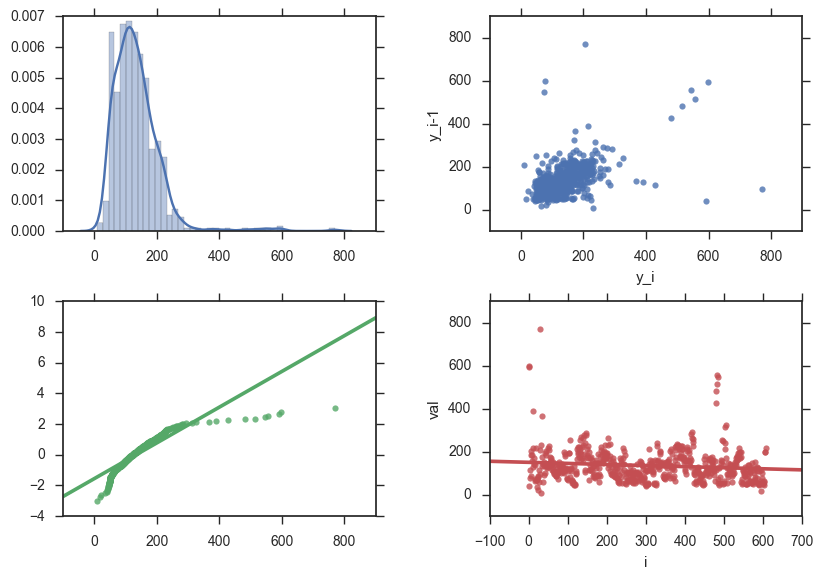

In [54]:
def fourPlot(series):
    fig, axs = plt.subplots(2,2)
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=2.0)
    
    #Histogram
    sns.distplot(series, ax = axs[0,0])
    
    #Lag plot
    lag = series.copy()
    lag = np.array(lag[:-1])
    current = series[1:]
    ax = sns.regplot(current, lag, fit_reg=False, ax=axs[0,1])
    ax.set_ylabel("y_i-1")
    ax.set_xlabel('y_i')
    
    #QQ plot
    qntls, xr = stats.probplot(series, fit=False)
    sns.regplot(xr, qntls, ax=axs[1,0], ci=0)
    
    #run sequence
    ax = sns.regplot(np.arange(len(series)), series, ax=axs[1,1], ci=0)
    ax.set_ylabel("val")
    ax.set_xlabel("i")

expected = (slope * threef.Water + intercept)
residuals = threef.Energy - expected
fourPlot(residuals)

# In the histogram the graph is mostly unimodal which means that the data is normally distributed. This means that the mean, 
# median and mode are all very similar. However, it does look like there are some outliers that are hard to see.

# In lag plot the points in the graph are somewhat correlated. There are a couple of outliers in the data which make the data
# look uncorrelated. This means that there could be a postive linear trend between water and energy.

# The QQ plot displays that the data is not normally distributed, because the points do not follow the linear regression curve
# very closely. This means that if we were deciding on whether to run the Spearman or Pearson test, we would choose Spearman.

# The run sequence plot shows us that much of the data is close to the expected output over time. However, there are a couple of
# points that are much greater than expected. This means that there may be a small factor that is influencing the variability.

# References:
[Official site for USDA food nutrients database](http://www.ars.usda.gov/Services/docs.htm?docid=8964)
[MySQL version of USDA food nutrients database and preprocessing scripts](https://github.com/mhess126/usda_national_nutrients)
